In [1]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [2]:
# load data
train = 'DataFiles/CreditCard_test.csv'
test = 'DataFiles/CreditCard_test.csv'

train_dataset = pd.read_csv(train, index_col=0, header=1)
test_dataset = pd.read_csv(test, index_col=0, header=1)

In [3]:
# split X, y
X_train, y_train = train_dataset.iloc[:,:-1], train_dataset.iloc[:,-1:]
X_test, y_test = test_dataset.iloc[:,:-1], test_dataset.iloc[:,-1:]

# reshape y into 1d column vector
y_train, y_test = np.reshape(y_train, (y_train.shape[0],)), np.reshape(y_test, (y_test.shape[0],))

Epoch 1/50
540/540 [==============================] - 2s 2ms/step - loss: 5321.4520 - accuracy: 0.6376 - val_loss: 462.1561 - val_accuracy: 0.6583
Epoch 2/50
540/540 [==============================] - 0s 780us/step - loss: 434.3044 - accuracy: 0.7321 - val_loss: 257.4911 - val_accuracy: 0.6550
Epoch 3/50
540/540 [==============================] - 0s 788us/step - loss: 256.6584 - accuracy: 0.7339 - val_loss: 365.9947 - val_accuracy: 0.6000
Epoch 4/50
540/540 [==============================] - 0s 807us/step - loss: 194.9026 - accuracy: 0.7358 - val_loss: 101.3847 - val_accuracy: 0.6917
Epoch 5/50
540/540 [==============================] - 0s 799us/step - loss: 198.0121 - accuracy: 0.7141 - val_loss: 158.0212 - val_accuracy: 0.7233
Epoch 6/50
540/540 [==============================] - 0s 797us/step - loss: 145.1840 - accuracy: 0.7265 - val_loss: 108.8815 - val_accuracy: 0.7400
Epoch 7/50
540/540 [==============================] - 0s 797us/step - loss: 138.8416 - accuracy: 0.7154 - val_los

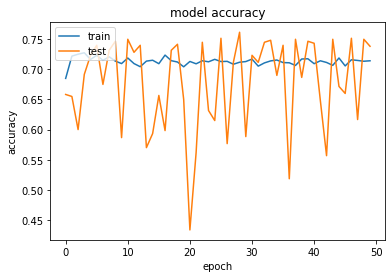

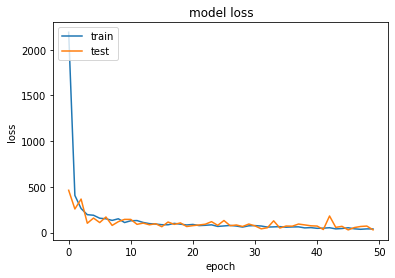

188/188 [==============================] - 0s 949us/step - loss: 23.3347 - accuracy: 0.7888
Training Accuracy: 78.88
188/188 [==============================] - 0s 961us/step - loss: 23.3347 - accuracy: 0.7888
Testing Accuracy: 78.88


In [4]:

input_dim = X_train.shape[1]

# simple sequential model
model = Sequential()
model.add(Dense(12, input_dim=input_dim, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# fit the keras model on the dataset
history = model.fit(X_train, y_train, validation_split=0.1, epochs=50, batch_size=10)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



# get final testing and training accuracy
_, accuracy = model.evaluate(X_train, y_train)
print('Training Accuracy: %.2f' % (accuracy*100))

_, accuracy = model.evaluate(X_test, y_test)
print('Testing Accuracy: %.2f' % (accuracy*100))


Epoch 1/50
1080/1080 [==============================] - 2s 1ms/step - loss: 12241.5468 - accuracy: 0.5507 - val_loss: 223.1666 - val_accuracy: 0.7483
Epoch 2/50
1080/1080 [==============================] - 1s 960us/step - loss: 612.8606 - accuracy: 0.6874 - val_loss: 62.7333 - val_accuracy: 0.7517
Epoch 3/50
1080/1080 [==============================] - 1s 1ms/step - loss: 202.0342 - accuracy: 0.7302 - val_loss: 13.6926 - val_accuracy: 0.7517
Epoch 4/50
1080/1080 [==============================] - 1s 1ms/step - loss: 59.2552 - accuracy: 0.7363 - val_loss: 6.6352 - val_accuracy: 0.7483
Epoch 5/50
1080/1080 [==============================] - 1s 1ms/step - loss: 23.0133 - accuracy: 0.7706 - val_loss: 1.5952 - val_accuracy: 0.7517
Epoch 6/50
1080/1080 [==============================] - 1s 1ms/step - loss: 46.0982 - accuracy: 0.7899 - val_loss: 1.2844 - val_accuracy: 0.7500
Epoch 7/50
1080/1080 [==============================] - 1s 1ms/step - loss: 21.2238 - accuracy: 0.7887 - val_loss: 1.24

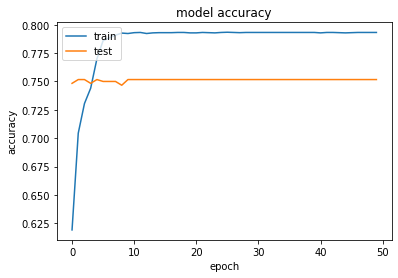

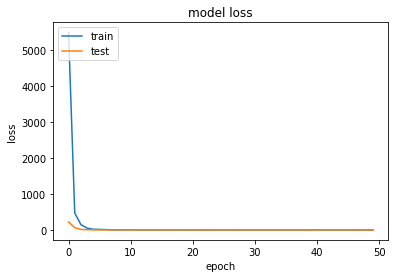

188/188 [==============================] - 0s 1ms/step - loss: 0.5201 - accuracy: 0.7890
Training Accuracy: 78.90


In [5]:
# implementation of this: https://ieeexplore.ieee.org/abstract/document/8966723

input_dim = X_train.shape[1]

# this model has dropout for regularization
model = Sequential()
model.add(Dense(input_dim, input_dim=input_dim, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(input_dim, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(input_dim, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# fit the keras model on the dataset
history = model.fit(X_train, y_train, validation_split=0.1, epochs=50, batch_size=5)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



# evaluate the keras model
_, accuracy = model.evaluate(X_train, y_train)
print('Training Accuracy: %.2f' % (accuracy*100))

# _, accuracy = model.evaluate(X_test, y_test)
# print('Testing Accuracy: %.2f' % (accuracy*100))


Feature Engineering: 

removing:  AGE, BILL_AMT3 ,BILL_AMT4, BILL_AMT5,  BILL_MT6



next: SEX, EDUCATION, MARRIAGE, AGE, BILL_AMT3 ,BILL_AMT4, BILL_AMT5, BILL_MT6


In [6]:
columns = ['AGE', 'BILL_AMT3' ,'BILL_AMT4', 'BILL_AMT5',  'BILL_AMT6']
X_train.drop(columns, inplace=True, axis=1)
X_test.drop(columns, inplace=True, axis=1)

/Users/Jurren/Library/Python/3.8/lib/python/site-packages/pandas/core/frame.py:4157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Epoch 1/50
1080/1080 [==============================] - 2s 1ms/step - loss: 12842.5340 - accuracy: 0.5971 - val_loss: 163.6791 - val_accuracy: 0.7050
Epoch 2/50
1080/1080 [==============================] - 1s 1ms/step - loss: 836.4039 - accuracy: 0.6751 - val_loss: 26.1353 - val_accuracy: 0.7533
Epoch 3/50
1080/1080 [==============================] - 1s 1ms/step - loss: 202.9876 - accuracy: 0.7117 - val_loss: 1.3324 - val_accuracy: 0.7517
Epoch 4/50
1080/1080 [==============================] - 1s 1ms/step - loss: 63.6250 - accuracy: 0.7474 - val_loss: 0.9221 - val_accuracy: 0.7517
Epoch 5/50
1080/1080 [==============================] - 1s 1ms/step - loss: 20.4682 - accuracy: 0.7678 - val_loss: 0.7912 - val_accuracy: 0.7517
Epoch 6/50
1080/1080 [==============================] - 1s 1ms/step - loss: 6.6844 - accuracy: 0.7757 - val_loss: 0.8720 - val_accuracy: 0.7517
Epoch 7/50
1080/1080 [==============================] - 1s 1ms/step - loss: 1.7108 - accuracy: 0.7857 - val_loss: 0.8369 - 

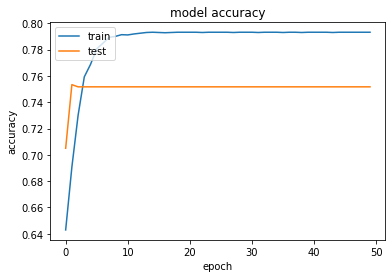

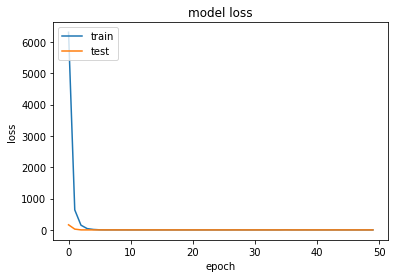

188/188 [==============================] - 0s 1ms/step - loss: 0.5150 - accuracy: 0.7890
Training Accuracy: 78.90


In [7]:
# implementation of this: https://ieeexplore.ieee.org/abstract/document/8966723

input_dim = X_train.shape[1]

# this model has dropout for regularization
model = Sequential()
model.add(Dense(input_dim, input_dim=input_dim, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(input_dim, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(input_dim, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# fit the keras model on the dataset
history = model.fit(X_train, y_train, validation_split=0.1, epochs=50, batch_size=5)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



# evaluate the keras model
_, accuracy = model.evaluate(X_train, y_train)
print('Training Accuracy: %.2f' % (accuracy*100))

# 
_, accuracy = model.evaluate(X_test, y_test)
print('Testing Accuracy: %.2f' % (accuracy*100))


In [8]:
_, accuracy = model.evaluate(X_test, y_test)
print('Testing Accuracy: %.2f' % (accuracy*100))

188/188 [==============================] - 0s 919us/step - loss: 0.5150 - accuracy: 0.7890
Testing Accuracy: 78.90
